## Imports

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

## Load data

In [25]:
data = pd.read_csv('200119-2-1_results.csv')
info = pd.read_csv('sample_info.csv')
merged = data.merge(info, on='Accession')
merged.head()
merged.to_csv('merged.csv')
ecoli_cov = merged.groupby('Accession').agg({'ecoli_coverage': 'max'})
merged = merged[merged['lib_type'] == 'dna']
merged = merged.drop(columns=['lib_type', 'ecoli_coverage'])
merged = merged.merge(ecoli_cov, on='Accession')


In [9]:
merged.head()

,SeqSple,Accession,total_reads,t7_reads,t7_normalized_reads,ecoli_reads,ecoli_normalized_reads,Human,Bacteria,Virus,Parasite,Fungus,Unclassified,DNAse,Organism spike,ecoli_coverage
0,200119-2-1-IDBD-D101312-d-13-AH2N3HAFX2-ACATAT...,IDBD-D101312,3084100,1946.0,6309.782432,6020,19519.470834,6.289971e+06,2.151059e+06,6844.784540,145786.453098,1731.461366,1.404608e+06,Thermo,E.coli,1.0
1,200119-2-1-IDBD-D101313-d-14-AH2N3HAFX2-TCATAG...,IDBD-D101313,2982434,1727.0,5790.572398,7898,26481.726000,6.106653e+06,2.406749e+06,6327.046969,123908.861018,1606.070746,1.354756e+06,Thermo,E.coli,1.0
2,200119-2-1-IDBD-D101314-d-15-AH2N3HAFX2-GTATTC...,IDBD-D101314,2080706,457.0,2196.369886,4114,19772.135035,6.446365e+06,1.365085e+06,2350.163839,256696.525122,1441.818306,1.928062e+06,Sigma,E.coli,1.0


## T7 Normalized Reads

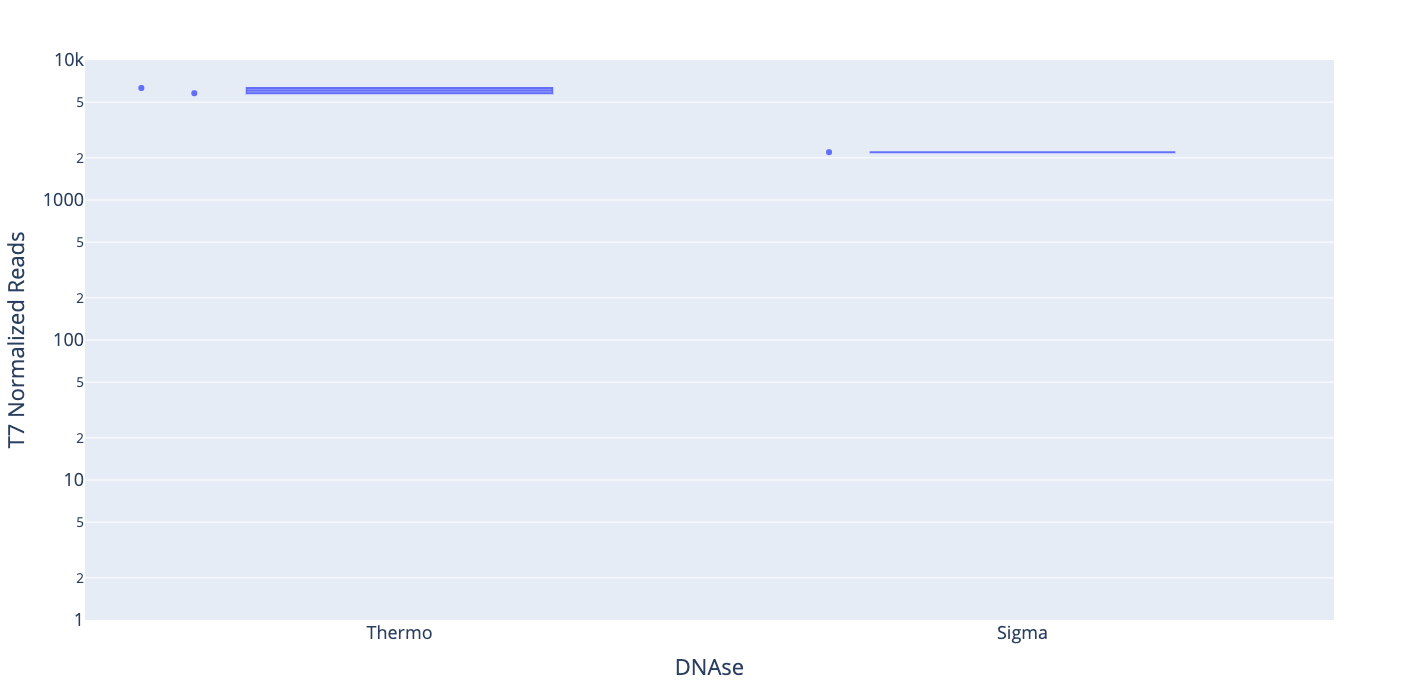

In [12]:
fig = px.box(merged,
    x='DNAse',
    y='t7_normalized_reads',
    labels={'t7_normalized_reads': 'T7 Normalized Reads'},
    points='all',
    hover_data=['Accession'],
    log_y=True
)
fig.update_layout(
    font=dict(size=18),
    height=700,
    width=1400
)
fig.update_yaxes(range=[0, 4])
fig.show()
fig.write_html('plots/T7_normalized_reads.html')

## Human Reads

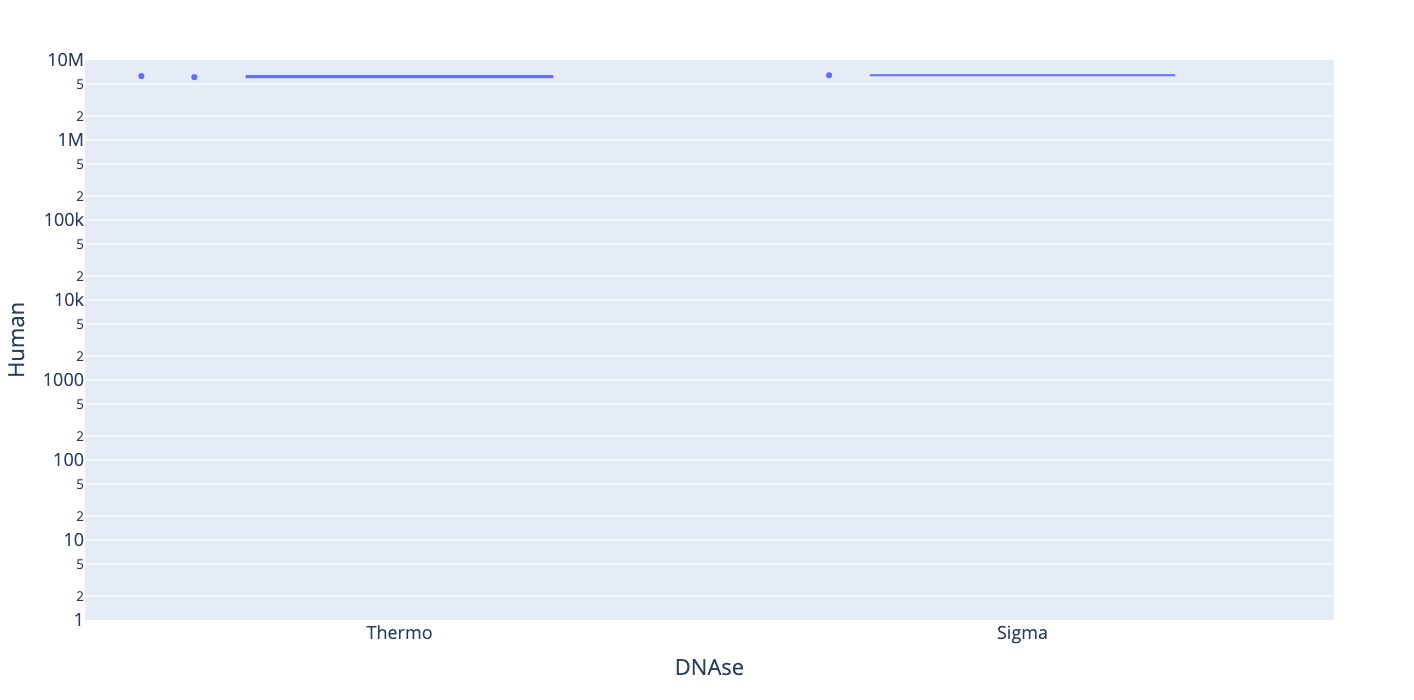

In [14]:
fig = px.box(
    merged,
    x='DNAse',
    y='Human',
    points='all',
    hover_data=['Accession'],
    log_y=True
)
fig.update_layout(height=700)
fig.update_layout(
    font=dict(size=18),
    height=700,
    width=1400
)
fig.update_yaxes(range=[0, 7])
fig.show()
fig.write_html('plots/Human_normalized_reads.html')

## Organism reads

In [16]:
merged_melt = pd.melt(
    merged, 
    value_vars=[
        'ecoli_normalized_reads',
        'Human'
    ],
    id_vars=['DNAse', 'Organism spike', 'Accession'],
    value_name='Normalized reads',
    var_name='Organism'
)
merged_melt['Organism'] = merged_melt['Organism'].replace({
    'ecoli_normalized_reads': 'Ecoli'
 })
merged_melt.head()

,DNAse,Organism spike,Accession,Organism,Normalized reads
0,Thermo,E.coli,IDBD-D101312,Ecoli,1.951947e+04
1,Thermo,E.coli,IDBD-D101313,Ecoli,2.648173e+04
2,Sigma,E.coli,IDBD-D101314,Ecoli,1.977214e+04
3,Thermo,E.coli,IDBD-D101312,Human,6.289971e+06
4,Thermo,E.coli,IDBD-D101313,Human,6.106653e+06


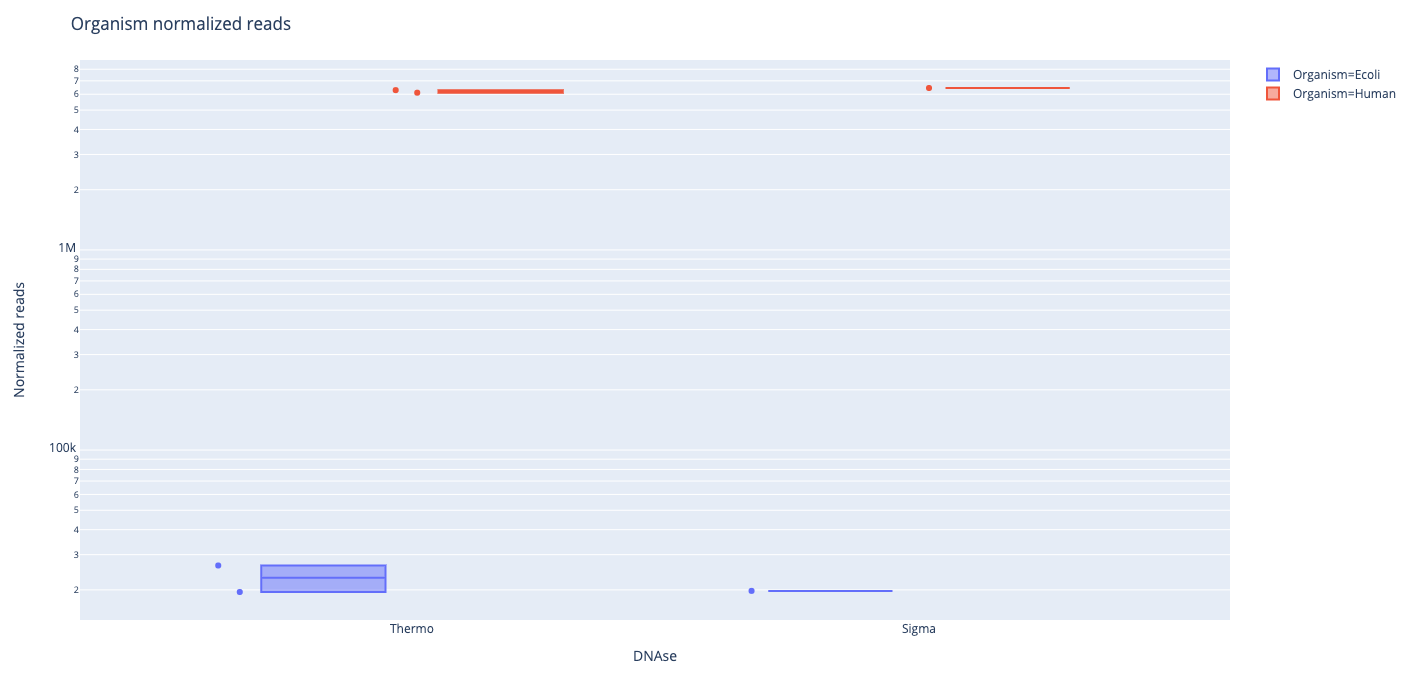

In [17]:
org_list = ['Ecoli', 'Human']
fig = px.box(merged_melt,
             x='DNAse', y='Normalized reads', color='Organism',
             log_y=True, points='all', hover_data=['Accession'])
fig.update_layout(height=700, title='Organism normalized reads')
fig.show()
fig.write_html('plots/Organism_normalized_reads_pool1.html')

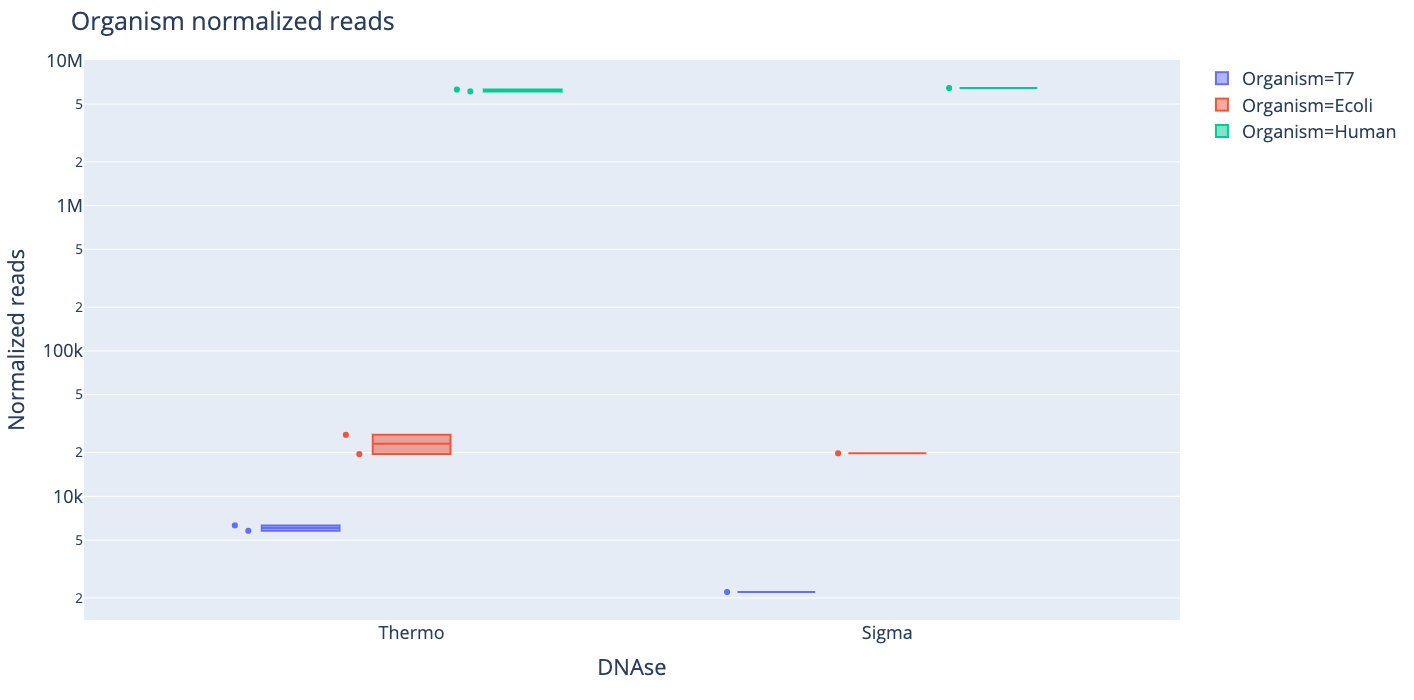

In [19]:
merged_melt = pd.melt(
    merged, 
    value_vars=[
        't7_normalized_reads',
        'ecoli_normalized_reads',
        'Human'
    ],
    id_vars=['DNAse', 'Organism spike', 'Accession'],
    value_name='Normalized reads',
    var_name='Organism'
)
merged_melt['Organism'] = merged_melt['Organism'].replace({
    'ecoli_normalized_reads': 'Ecoli',
    't7_normalized_reads': 'T7'
 })
merged_melt.head()
fig = px.box(merged_melt,
             x='DNAse', y='Normalized reads', color='Organism',
             log_y=True, points='all', hover_data=['Accession'])
fig.update_layout(height=700, title='Organism normalized reads', font=dict(size=18))
fig.show()
fig.write_html('plots/Organism_normalized_reads_pool1.html')

## 16s Coverage

In [24]:
merged.columns

Index(['SeqSple', 'Accession', 'total_reads', 't7_reads',
       't7_normalized_reads', 'ecoli_reads', 'ecoli_normalized_reads', 'Human',
       'Bacteria', 'Virus', 'Parasite', 'Fungus', 'Unclassified', 'DNAse',
       'Organism spike', 'ecoli_coverage'],
      dtype='object')

In [26]:
merged_melt_cov = pd.melt(
    merged, 
    value_vars=[
        'ecoli_coverage',
    ],
    id_vars=['DNAse', 'Organism', 'Accession'],
    value_name='Coverage',
    var_name='Organism'
)
merged_melt_cov['Organism'] = merged_melt['Organism'].replace({
    'ecoli_coverage': 'Ecoli'
})
merged_melt_cov.head()

,DNAse,Organism,Accession,Organism,Coverage
0,Thermo,T7,IDBD-D101312,T7,1.0
1,Thermo,T7,IDBD-D101313,T7,1.0
2,Sigma,T7,IDBD-D101314,T7,1.0


In [27]:
org_list = ['Ecoli']
fig = px.box(merged_melt_cov[(merged_melt_cov['Organism'].isin(org_list)) & ~(merged_melt_cov['Coverage'] == 0)],
             x='DNAse', y='Coverage', color='Organism',
             points='all', hover_data=['Accession'])
fig.update_layout(height=700, title='Organism coverage, Pool 8')
fig.show()
fig.write_html('plots/Organism_coverage_pool8.html')

TypeError: '<' not supported between instances of 'str' and 'int'

In [28]:
fig = px.bar(merged_melt2, x='Description', y='Normalized reads', color='Organism', barmode='stack',
             category_orders={'Organism': ['Bacteria', 'Virus', 'Human', 'Unclassified', 'Fungus', 'Parasite']})
fig.update_layout(xaxis_title=None, height=700, title='Sample Composition')
fig.show()
fig.write_html('plots/Sample_composition.html')

NameError: name 'merged_melt2' is not defined